In [2]:
import numpy as np
from glob import glob
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

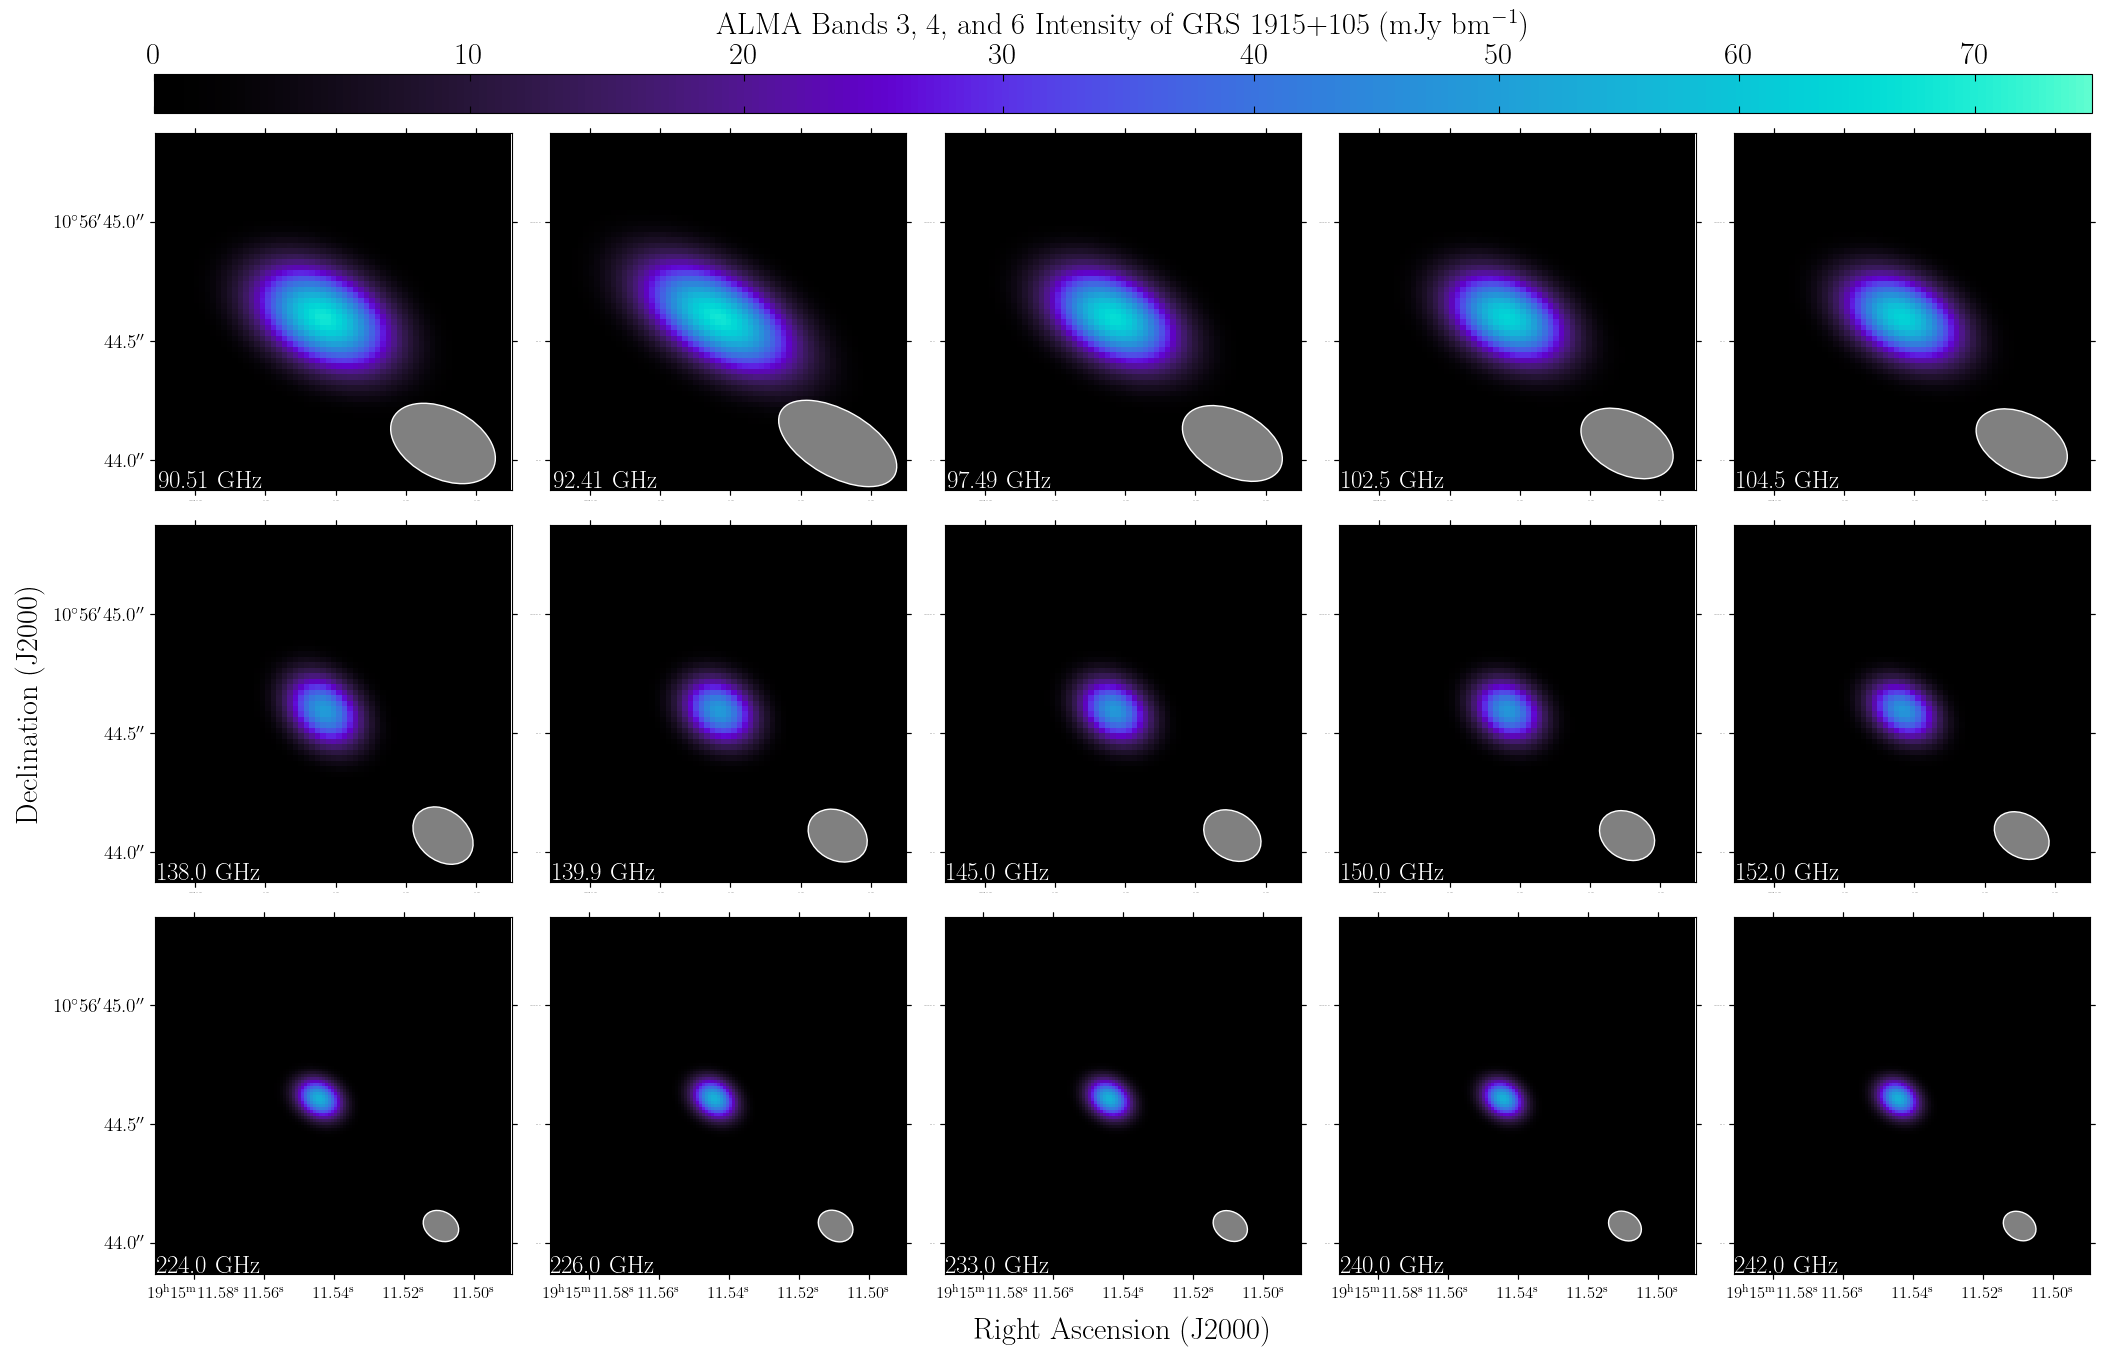

In [3]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.45*u.arcsec,-0.55*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(0, 0, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz',fontsize=label_fsize-8,color='w')
    
    return fig, ax_bkimg
    

img_list = ['Xf60_spw0_pb.fits', 'Xf60_spw1_pb.fits', 'Xf60_postcal_pb.fits', 'Xf60_spw2_pb.fits', 'Xf60_spw3_pb.fits', 'X1080_spw0_pb.fits', 'X1080_spw1_pb.fits', 'X1080_postcal_pb.fits', 'X1080_spw2_pb.fits', 'X1080_spw3_pb.fits', 'X119e_spw0_pb.fits', 'X119e_spw1_pb.fits', 'X119e_postcal_pb.fits', 'X119e_spw2_pb.fits', 'X119e_spw3_pb.fits']
#img_list = glob('*_pb.fits')[:55] 
fig = plt.figure(figsize=(25,25))
label_fsize = 26

center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [1.5*u.arcsecond,1.5*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img);

cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='testfig7.png')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

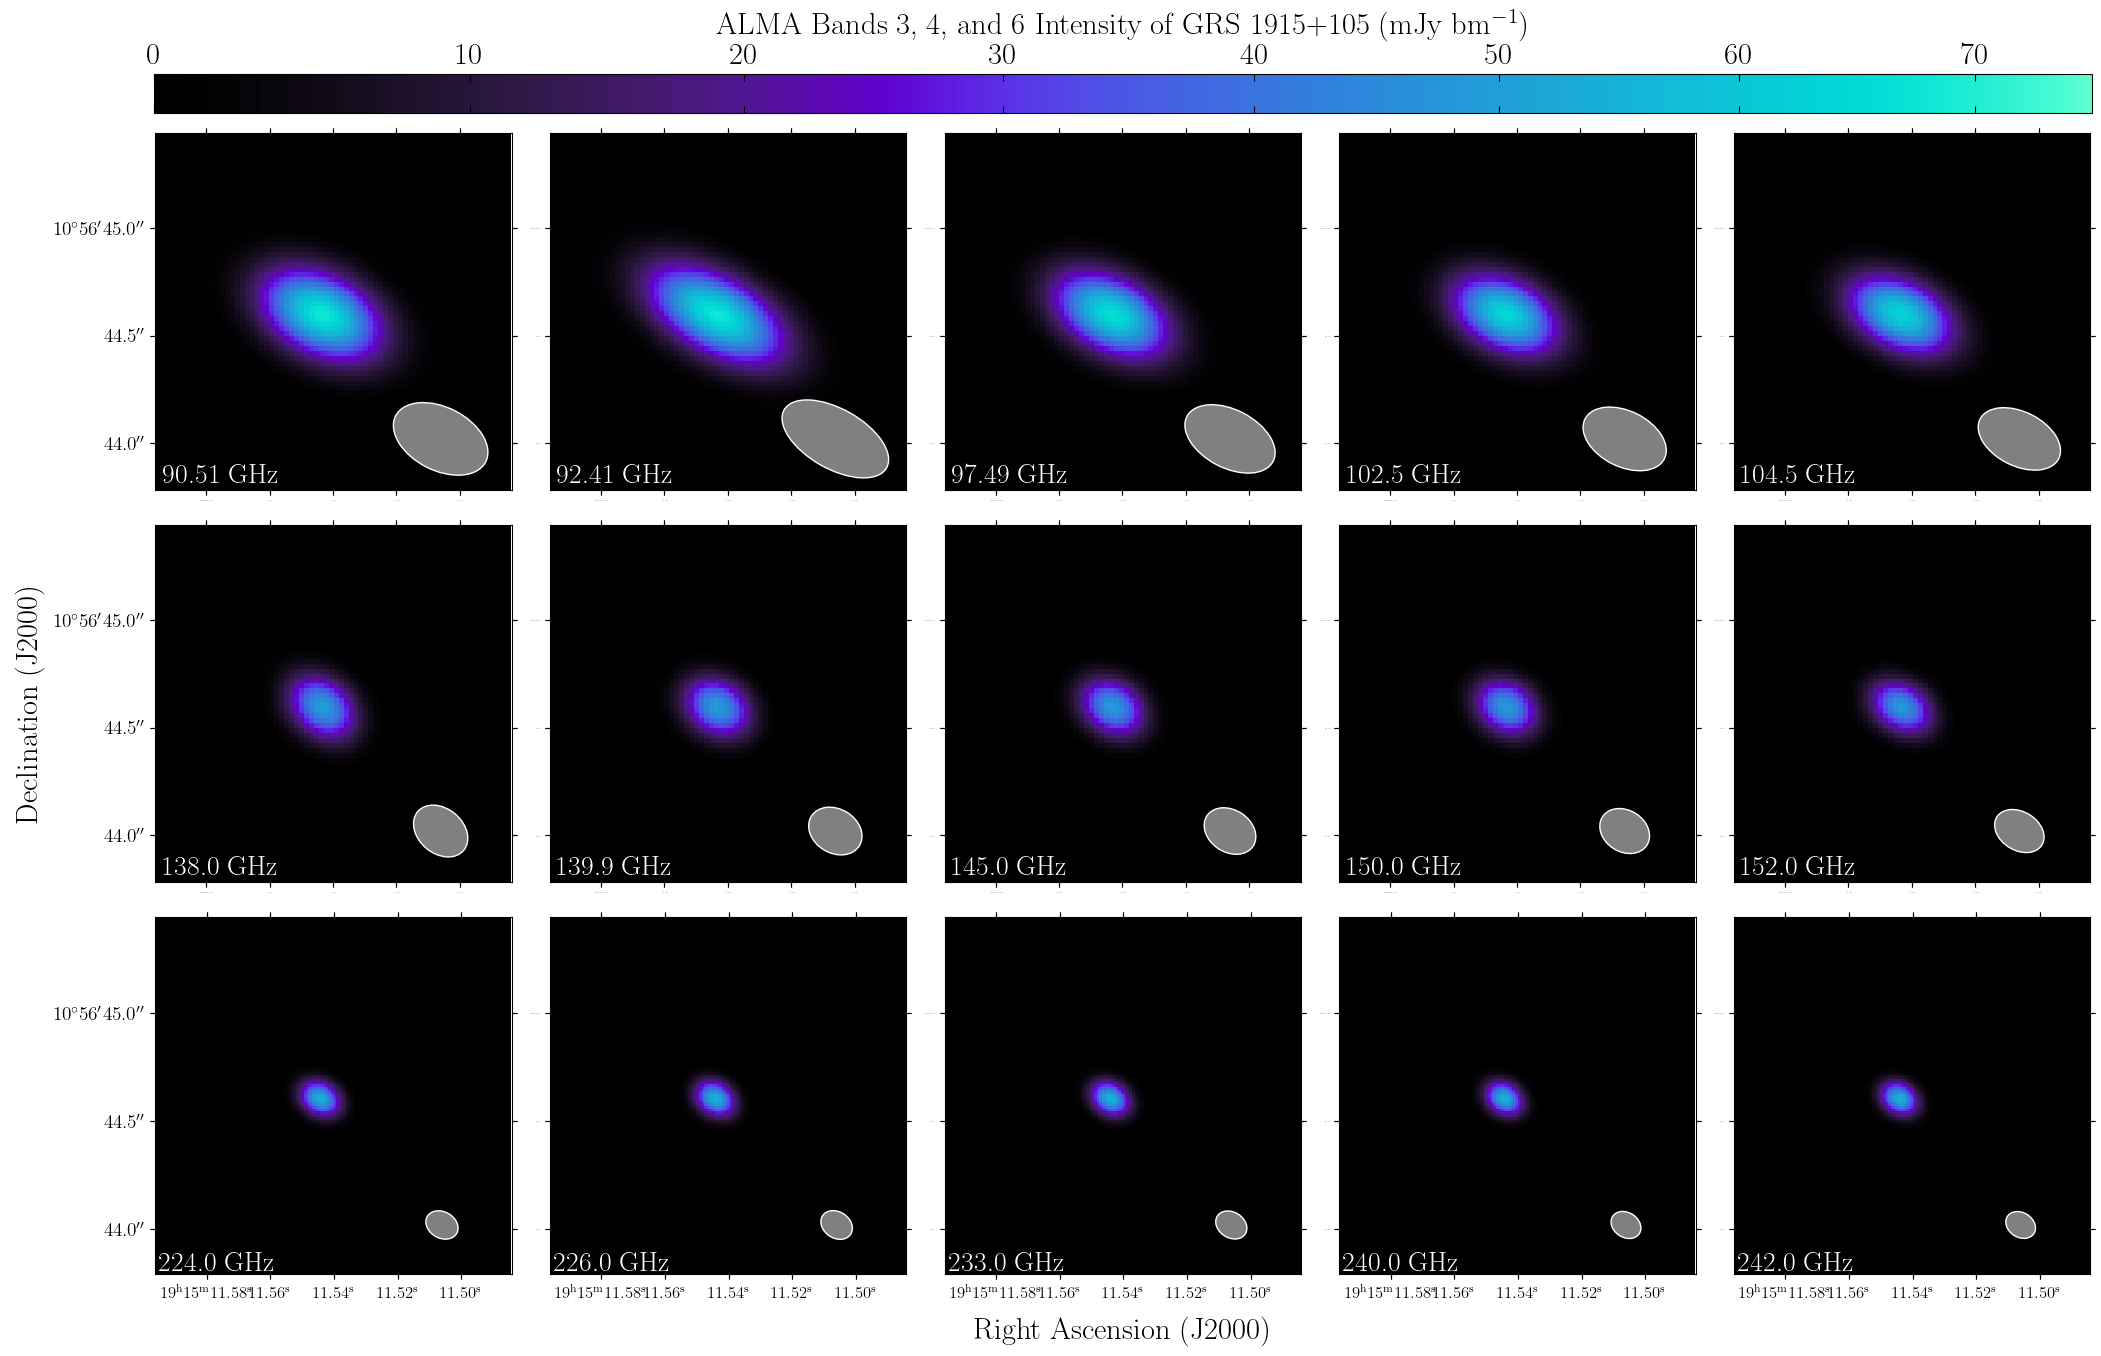

In [2]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.5*u.arcsec,-0.6*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz',fontsize=20,color='w')
    
    return fig, ax_bkimg
    

img_list = ['Xf60_spw0_pb.fits', 'Xf60_spw1_pb.fits', 'Xf60_postcal_pb.fits', 'Xf60_spw2_pb.fits', 'Xf60_spw3_pb.fits', 'X1080_spw0_pb.fits', 'X1080_spw1_pb.fits', 'X1080_postcal_pb.fits', 'X1080_spw2_pb.fits', 'X1080_spw3_pb.fits', 'X119e_spw0_pb.fits', 'X119e_spw1_pb.fits', 'X119e_postcal_pb.fits', 'X119e_spw2_pb.fits', 'X119e_spw3_pb.fits']
#img_list = glob('*_pb.fits')[:55] 
fig = plt.figure(figsize=(25,25))
label_fsize = 26

center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [1.65*u.arcsecond,1.65*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img);

cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='testfig8.png')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

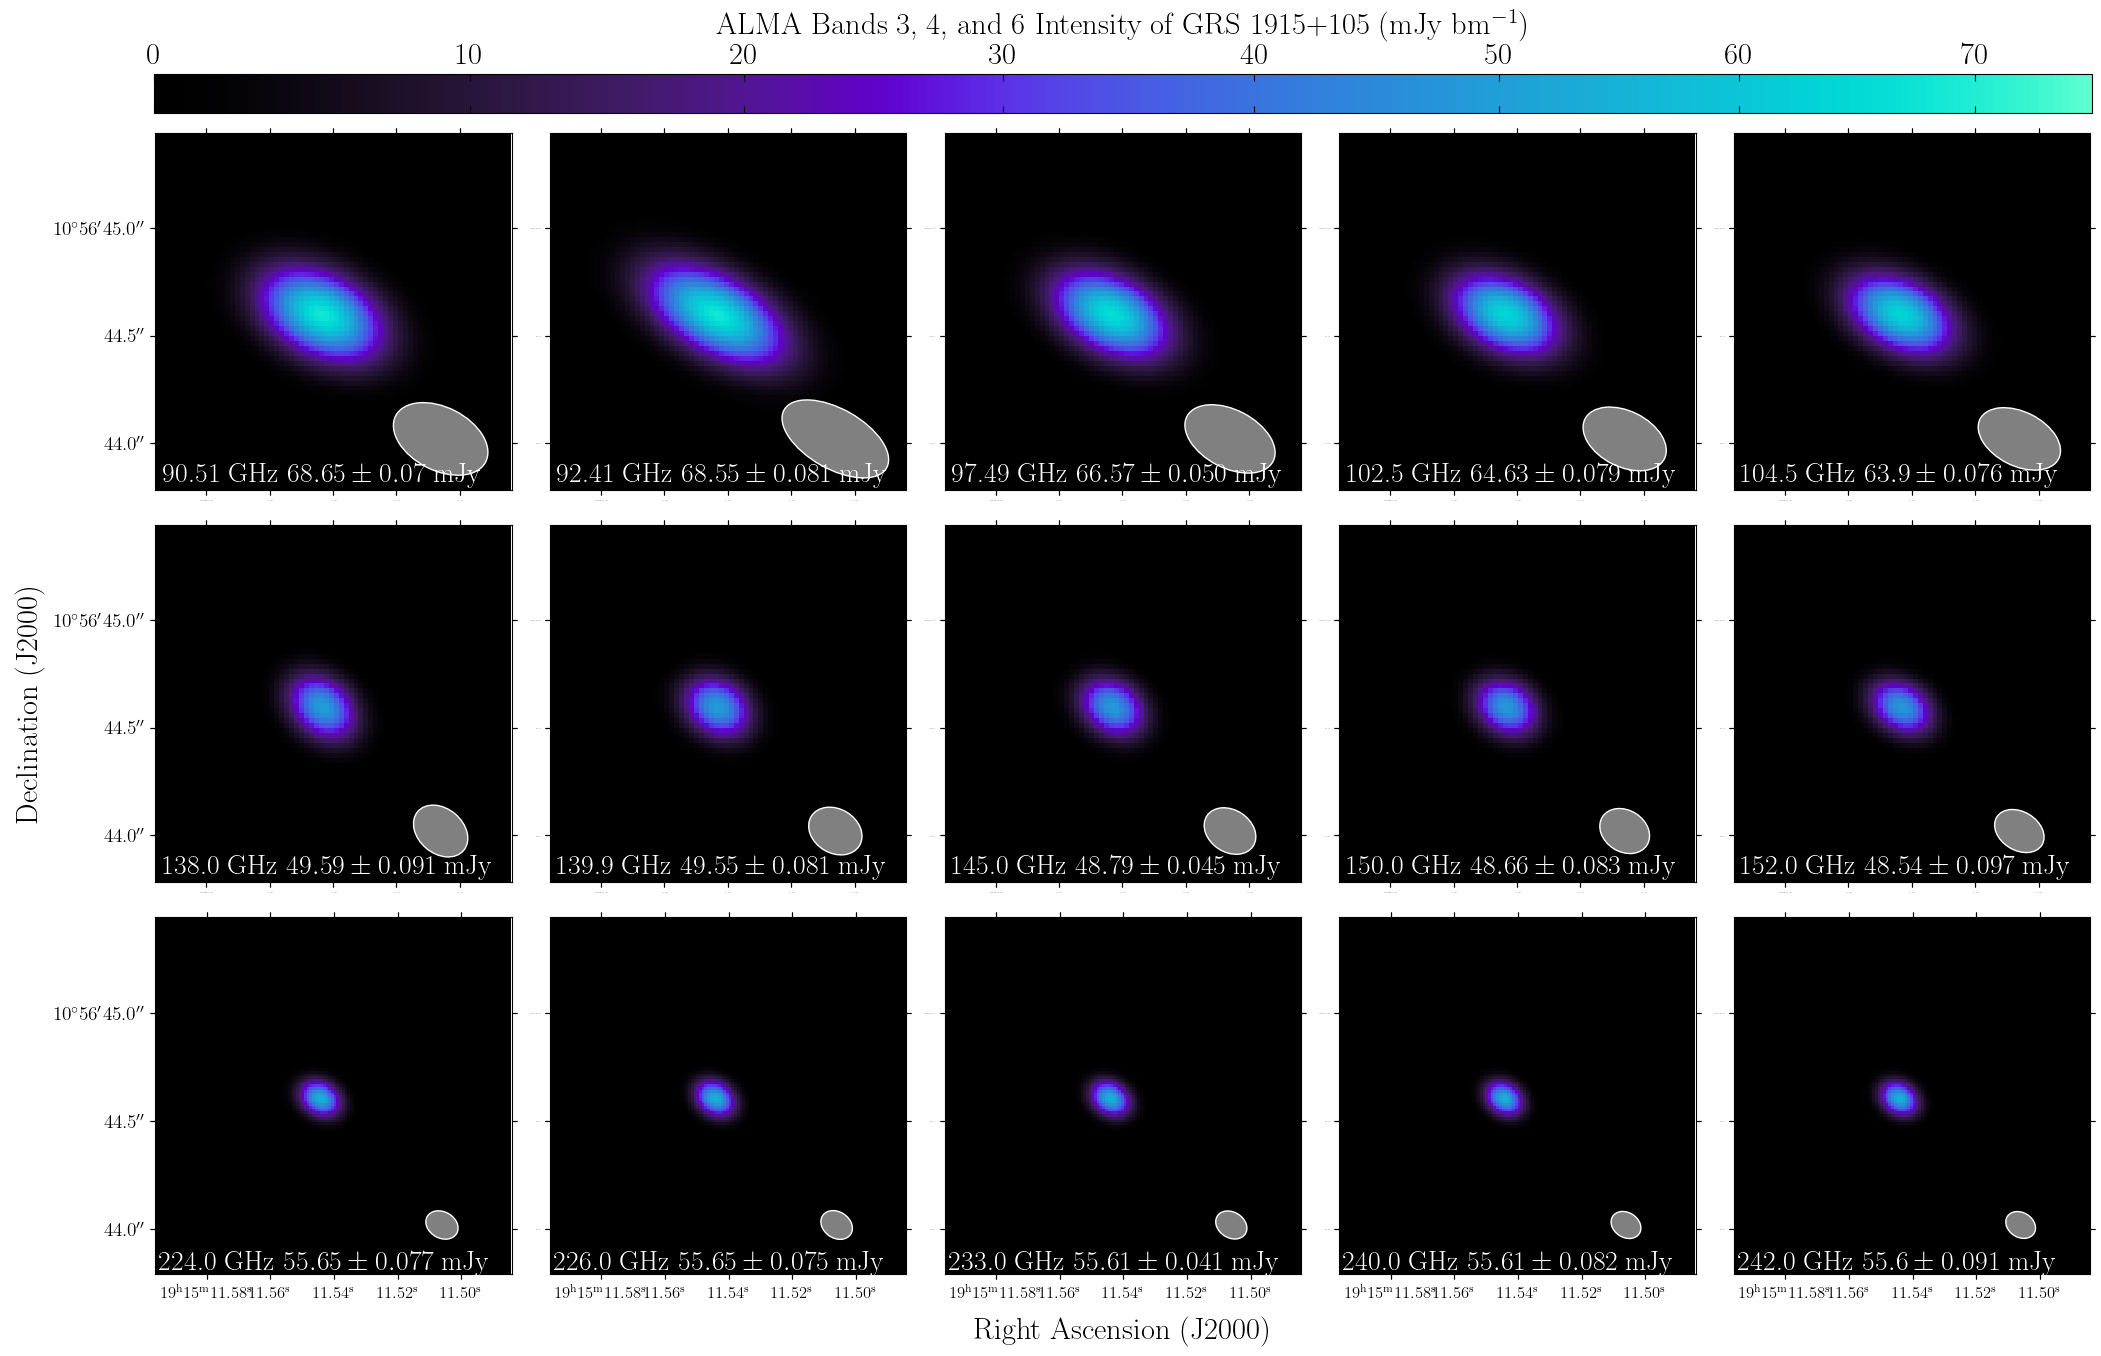

In [28]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$68.65\pm 0.07$', '$68.55\pm 0.081$', '$66.57\pm 0.050$', '$64.63\pm 0.079$', '$63.9\pm 0.076$', 
                '$49.59\pm 0.091$', '$49.55\pm 0.081$', '$48.79\pm 0.045$', '$48.66\pm 0.083$', '$48.54\pm 0.097$', 
                '$55.65\pm 0.077$', '$55.65\pm 0.075$', '$55.61\pm 0.041$', '$55.61\pm 0.082$', '$55.6\pm 0.091$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.5*u.arcsec,-0.6*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+' '+str(all_fluxes[flux_num])+' mJy',fontsize=20,color='w')
    
    return fig, ax_bkimg
    

img_list = ['Xf60_spw0_pb.fits', 'Xf60_spw1_pb.fits', 'Xf60_postcal_pb.fits', 'Xf60_spw2_pb.fits', 'Xf60_spw3_pb.fits', 'X1080_spw0_pb.fits', 'X1080_spw1_pb.fits', 'X1080_postcal_pb.fits', 'X1080_spw2_pb.fits', 'X1080_spw3_pb.fits', 'X119e_spw0_pb.fits', 'X119e_spw1_pb.fits', 'X119e_postcal_pb.fits', 'X119e_spw2_pb.fits', 'X119e_spw3_pb.fits']
fig = plt.figure(figsize=(25,25))
label_fsize = 26

center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [1.65*u.arcsecond,1.65*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='testfig9.png')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

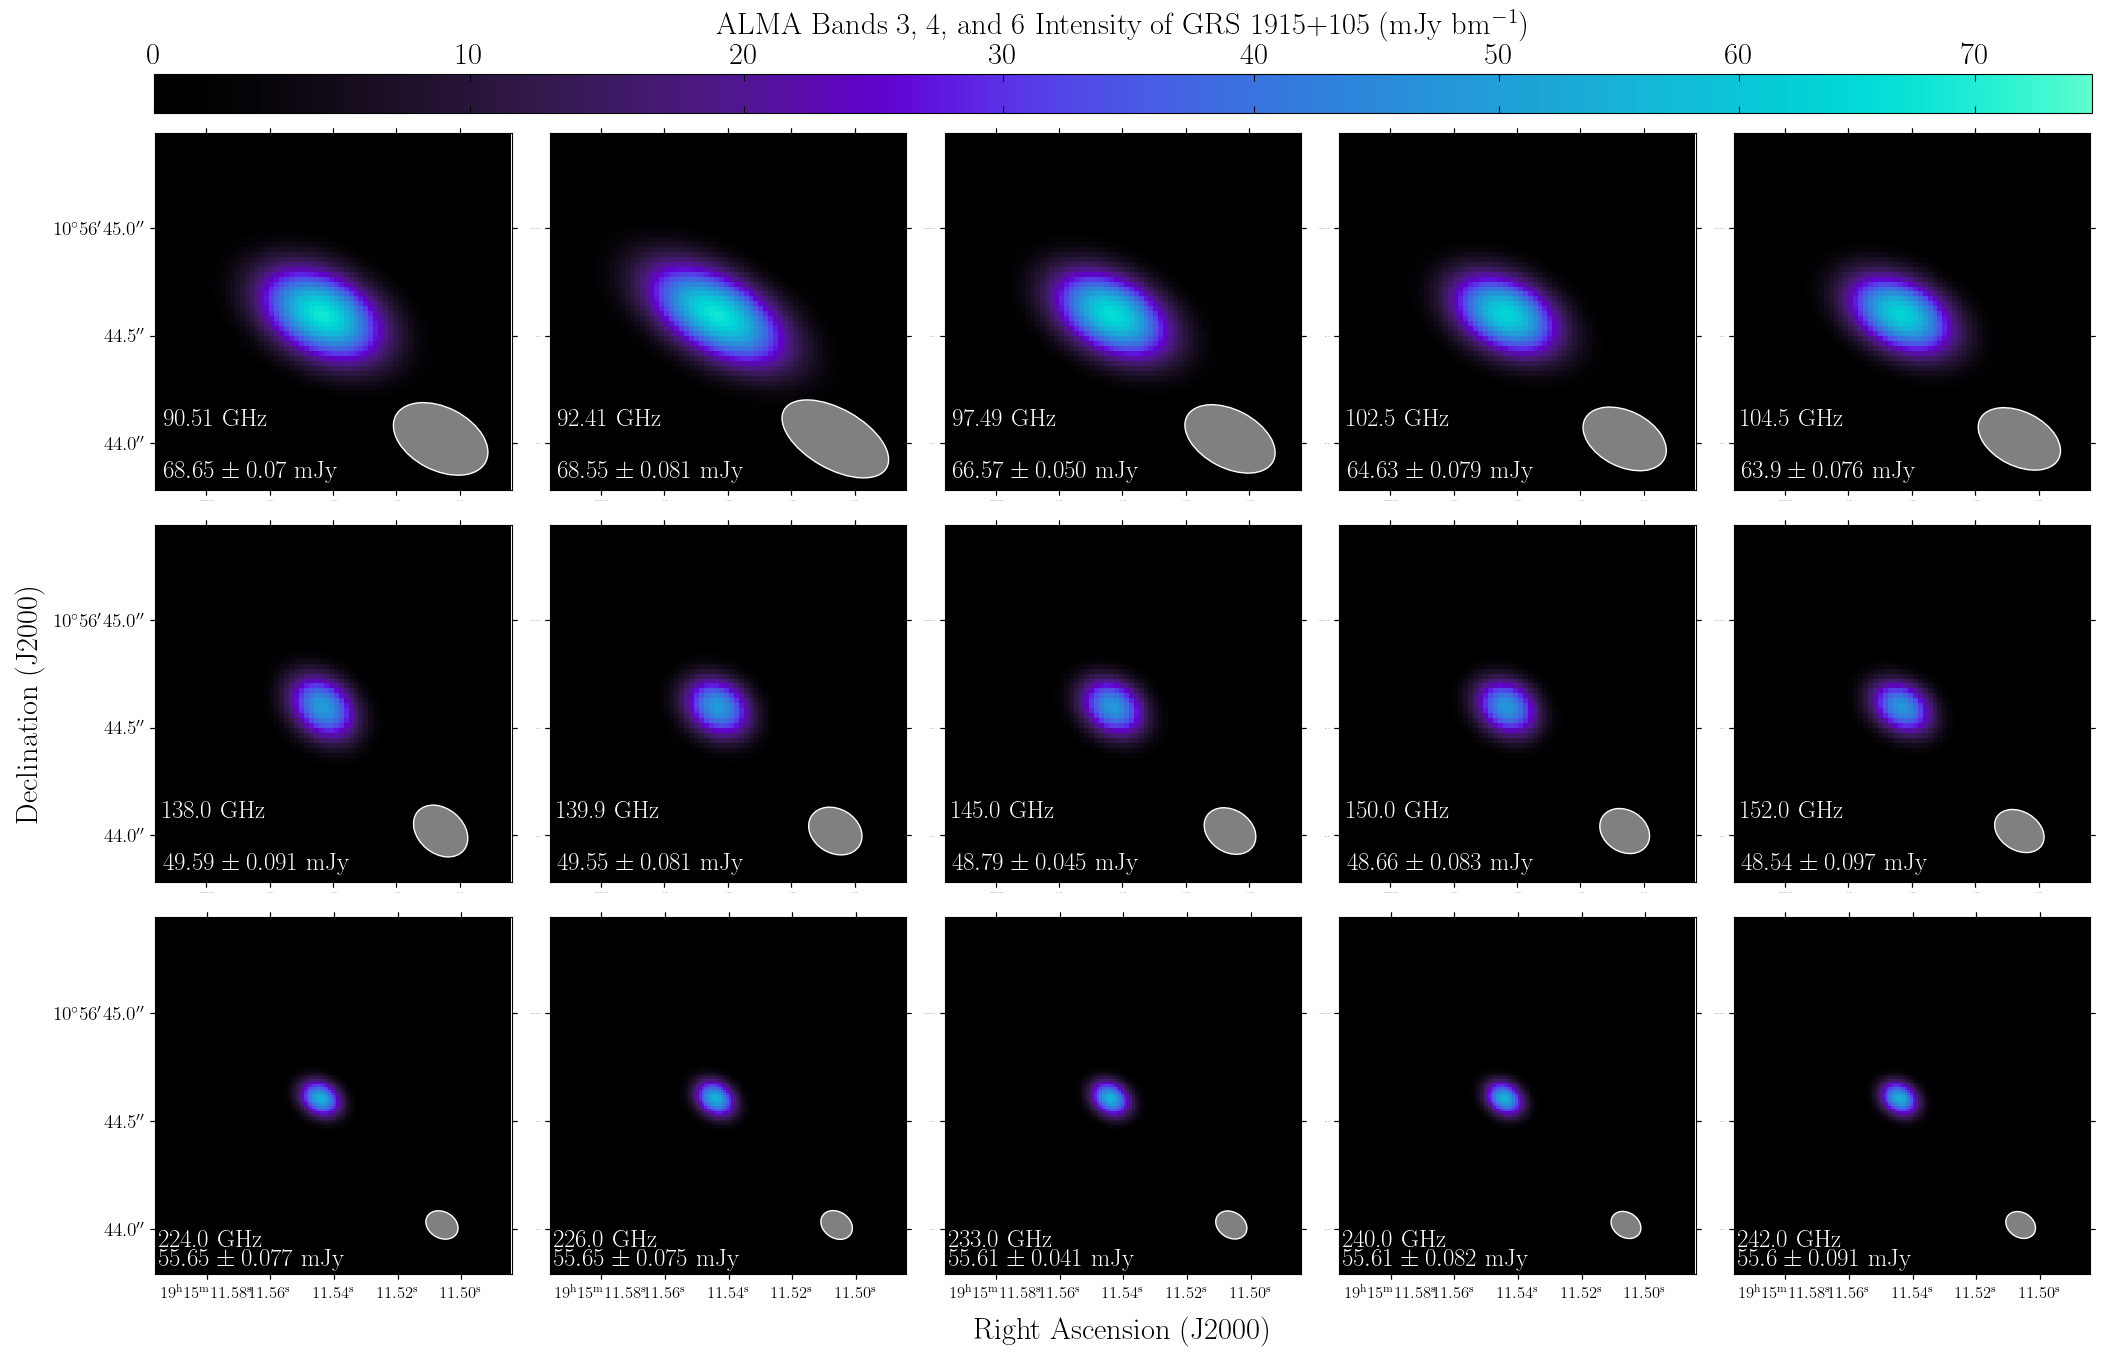

In [29]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$68.65\pm 0.07$', '$68.55\pm 0.081$', '$66.57\pm 0.050$', '$64.63\pm 0.079$', '$63.9\pm 0.076$', 
                '$49.59\pm 0.091$', '$49.55\pm 0.081$', '$48.79\pm 0.045$', '$48.66\pm 0.083$', '$48.54\pm 0.097$', 
                '$55.65\pm 0.077$', '$55.65\pm 0.075$', '$55.61\pm 0.041$', '$55.61\pm 0.082$', '$55.6\pm 0.091$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.5*u.arcsec,-0.6*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 16, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz',fontsize=18,color='w', verticalalignment='top')
    ax.text(1, 1, str(all_fluxes[flux_num])+' mJy',fontsize=18,color='w',verticalalignment='bottom')
    
    return fig, ax_bkimg
    

img_list = ['Xf60_spw0_pb.fits', 'Xf60_spw1_pb.fits', 'Xf60_postcal_pb.fits', 'Xf60_spw2_pb.fits', 'Xf60_spw3_pb.fits', 'X1080_spw0_pb.fits', 'X1080_spw1_pb.fits', 'X1080_postcal_pb.fits', 'X1080_spw2_pb.fits', 'X1080_spw3_pb.fits', 'X119e_spw0_pb.fits', 'X119e_spw1_pb.fits', 'X119e_postcal_pb.fits', 'X119e_spw2_pb.fits', 'X119e_spw3_pb.fits']
fig = plt.figure(figsize=(25,25))
label_fsize = 26

center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [1.65*u.arcsecond,1.65*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='testfig10.png')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

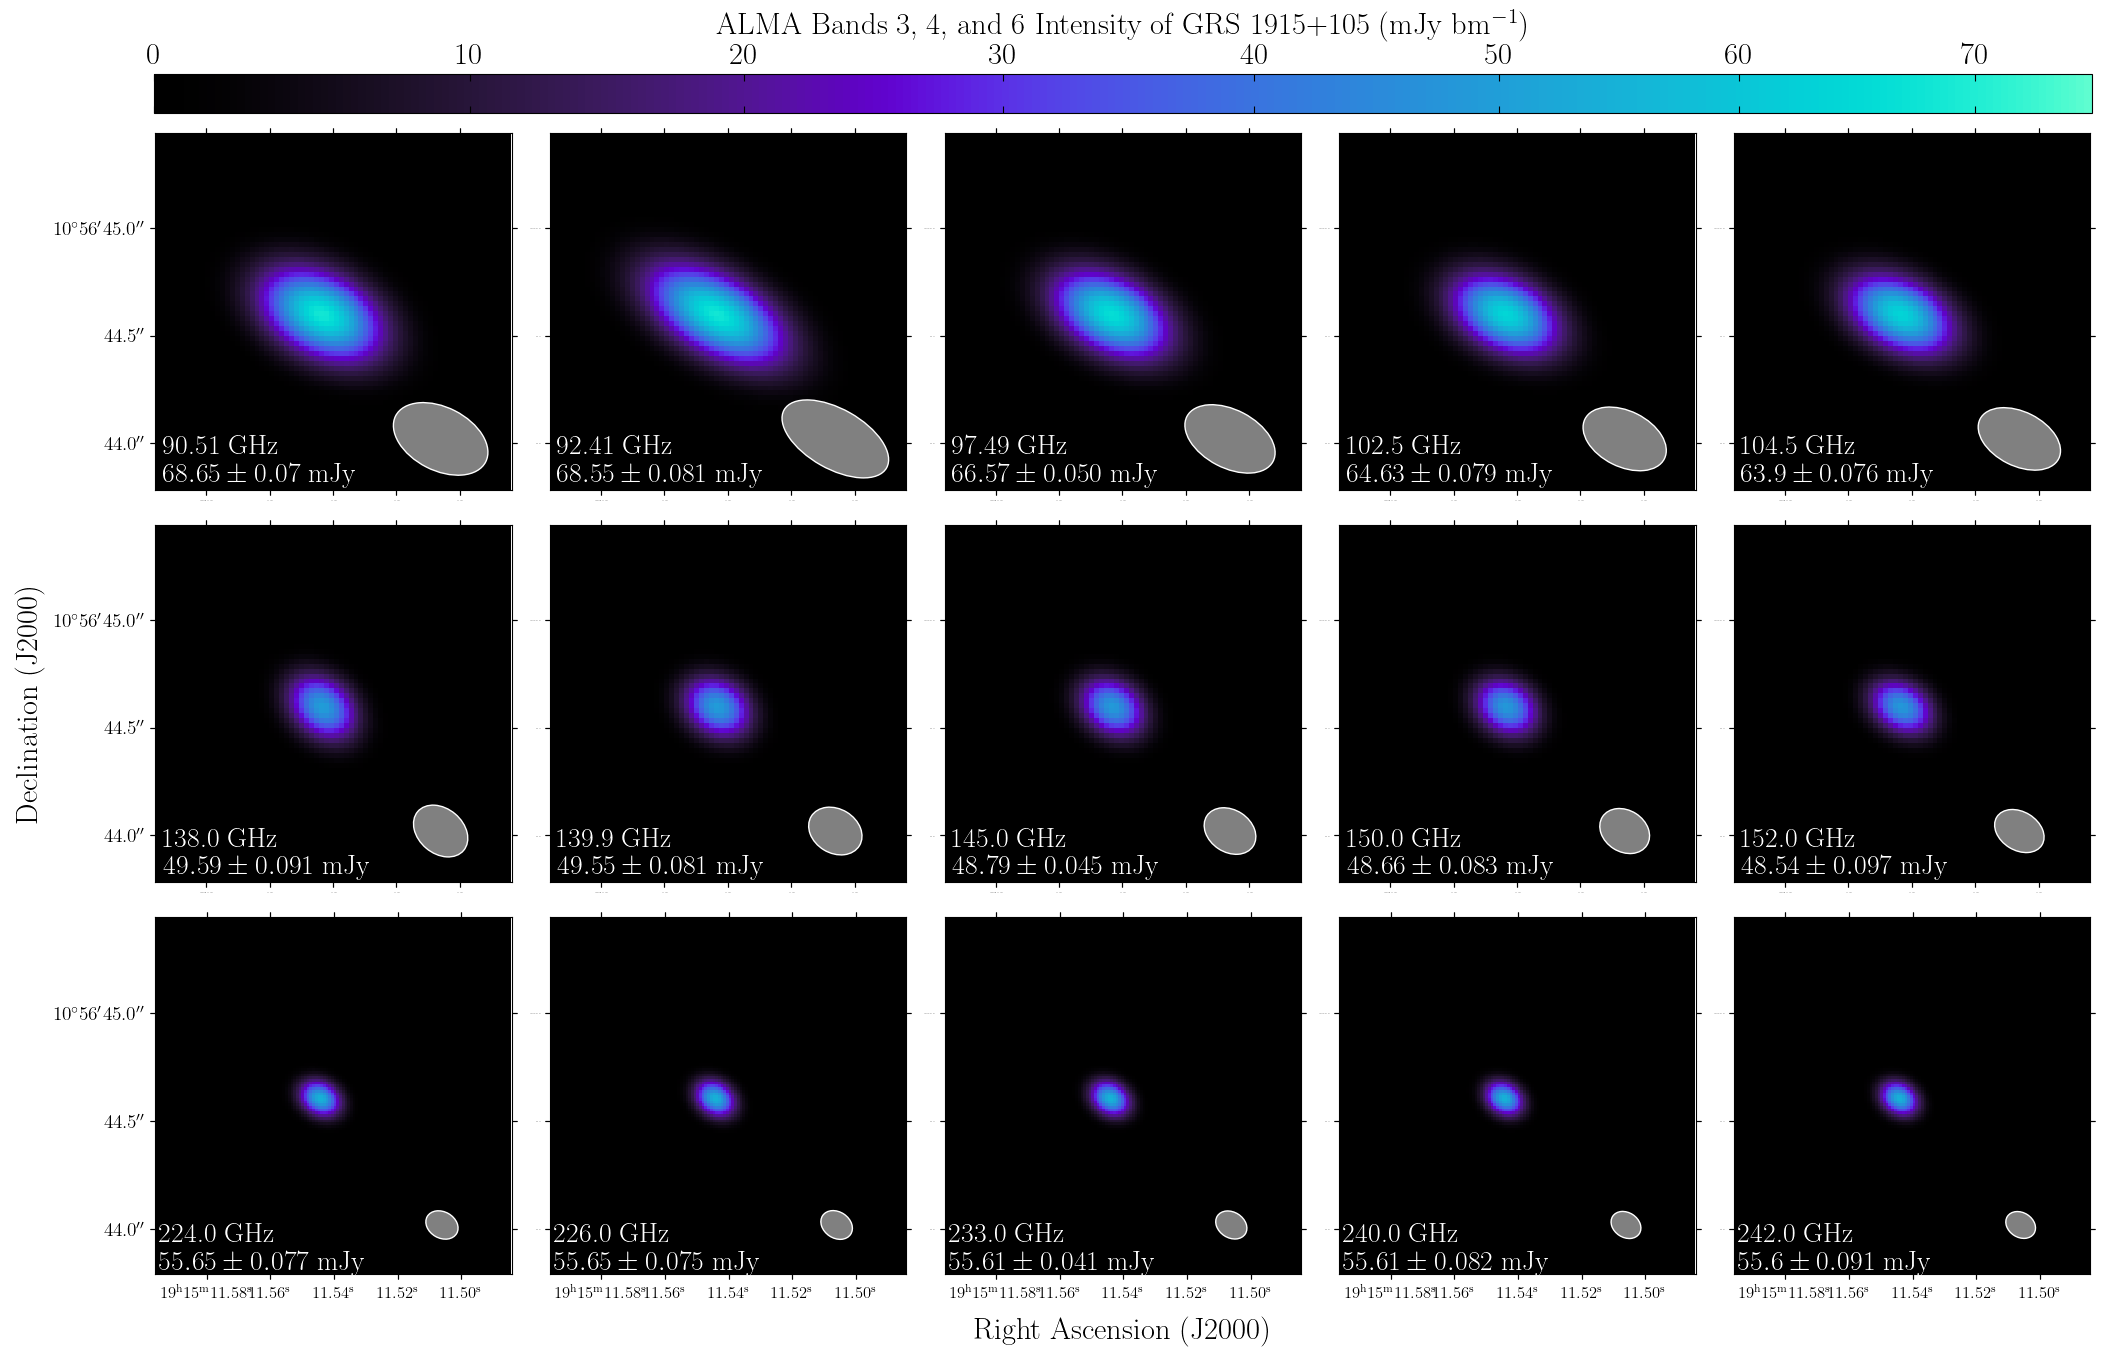

In [6]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$68.65\pm 0.07$', '$68.55\pm 0.081$', '$66.57\pm 0.050$', '$64.63\pm 0.079$', '$63.9\pm 0.076$', 
                '$49.59\pm 0.091$', '$49.55\pm 0.081$', '$48.79\pm 0.045$', '$48.66\pm 0.083$', '$48.54\pm 0.097$', 
                '$55.65\pm 0.077$', '$55.65\pm 0.075$', '$55.61\pm 0.041$', '$55.61\pm 0.082$', '$55.6\pm 0.091$']
        
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.5*u.arcsec,-0.6*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 2 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 2:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=20,color='w')
    
    return fig, ax_bkimg
    

img_list = ['Xf60_spw0_pb.fits', 'Xf60_spw1_pb.fits', 'Xf60_postcal_pb.fits', 'Xf60_spw2_pb.fits', 'Xf60_spw3_pb.fits', 'X1080_spw0_pb.fits', 'X1080_spw1_pb.fits', 'X1080_postcal_pb.fits', 'X1080_spw2_pb.fits', 'X1080_spw3_pb.fits', 'X119e_spw0_pb.fits', 'X119e_spw1_pb.fits', 'X119e_postcal_pb.fits', 'X119e_spw2_pb.fits', 'X119e_spw3_pb.fits']
fig = plt.figure(figsize=(25,25))
label_fsize = 26

center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [1.65*u.arcsecond,1.65*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,5,5,int(meer_n/5),meer_n%5,meer_img,meer_n);
    
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,8.8),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GRS_1915_tiles.pdf', bbox_inches='tight')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


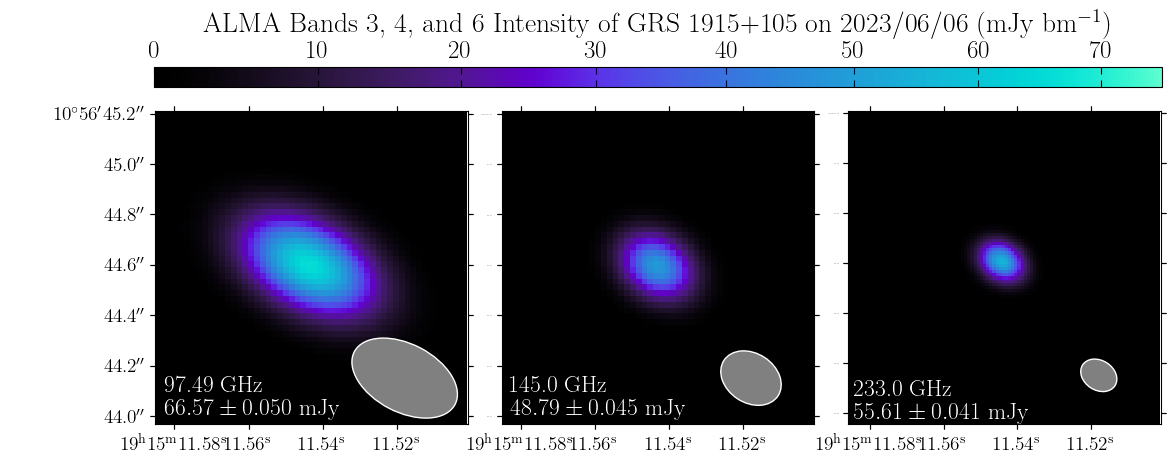

In [4]:
#center = SkyCoord('19h15m11.5437031794s', '10:56:44.6250891674deg', frame='icrs')
center = SkyCoord('19h15m11.5437031794s', '10:56:44.58deg', frame='icrs')
#box_bkg = [1.65*u.arcsecond,1.65*u.arcsecond]
box_bkg = [1.25*u.arcsecond,1.25*u.arcsecond]
box_contour1 = [1.5*u.arcsecond,1.5*u.arcsecond]

def add_panel(fig, nrows, ncols, row, col, bkg_fname, flux_num):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
    all_fluxes=['$66.57\pm 0.050$','$48.79\pm 0.045$', '$55.61\pm 0.041$']
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=75.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-0.38*u.arcsec,-0.43*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 1 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.8)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 1 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=22,ha='center')
    else:
        ax.set_xlabel(r" ", size=6)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 0:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)
    if row == 2:
        axra.set_ticklabel(size=12, horizontalalignment='left')
    ax.text(1, 1, str(round_sig(bkg_im[0].header['CRVAL3']/1000000000,4))+' GHz'+'\n'+str(all_fluxes[flux_num])+' mJy',fontsize=17,color='w')

    
    return fig, ax_bkimg

img_list = ['Xf60_postcal_pb.fits', 'X1080_postcal_pb.fits', 'X119e_postcal_pb.fits']
fig = plt.figure(figsize=(13,13))
label_fsize = 26

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,3,3,int(meer_n/3),meer_n%3,meer_img,meer_n);
    
cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,13.25),aspect=50)
cbar.ax.set_title('ALMA Bands 3, 4, and 6 Intensity of GRS 1915+105 on 2023/06/06 (mJy bm$^{-1}$)',fontsize=20,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.savefig(fname='GRS1915_tiles_whole_band_20230606.pdf', bbox_inches='tight')